In [32]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file
# csv_file_path = 'your_csv_file.csv'  # Replace 'your_csv_file.csv' with your file path
df = pd.read_csv('loan_old.csv')

# Display the first few rows of the DataFrame
df

Matplotlib is building the font cache; this may take a moment.


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Hp\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Hp\\AppData\\Local\\Temp\\pip-install-14hnv1er\\sklearn_7f6667e1777e4544b4134815d326af85\\setup.py'"'"'; __file__='"'"'C:\\Users\\Hp\\AppData\\Local\\Temp\\pip-install-14hnv1er\\sklearn_7f6667e1777e4544b4134815d326af85\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Hp\AppData\Local\Temp\pip-pip-egg-info-25v5wehk'
         cwd: C:\Users\Hp\AppData\Local\Temp\pip-install-14hnv1er\sklearn_7f6667e1777e4544b4134815d326af85\
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than '

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,144.0,1.0,Urban,NaN,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,2900,0.0,144.0,1.0,Rural,76.16,Y
610,LP002979,Male,Yes,3+,Graduate,4106,0.0,72.0,1.0,Rural,33.47,Y
611,LP002983,Male,Yes,1,Graduate,8072,240.0,144.0,1.0,Urban,348.92,Y
612,LP002984,Male,Yes,2,Graduate,7583,0.0,144.0,1.0,Urban,312.18,Y


In [34]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64


In [15]:
# There are many entries with missing values

In [53]:
# Separate the numerical and categorical columns
numerical_columns = ['Coapplicant_Income', 'Income', 'Max_Loan_Amount']
categorical_columns = [col for col in df.columns if col not in numerical_columns]


# Display the results
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['Coapplicant_Income', 'Income', 'Max_Loan_Amount']

Categorical Columns:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Loan_Tenor', 'Credit_History', 'Property_Area', 'Loan_Status']


In [54]:
# Find numerical columns
numerical_columns = df[numerical_columns]

# Calculate the range (max-min) for each numerical column
column_ranges = numerical_columns.apply(lambda x: x.max() - x.min())

# Calculate the standard deviation for each numerical column
column_stddevs = numerical_columns.apply(lambda x: x.std())

# Display the range and standard deviation for each numerical column
print("Range for Numerical Columns:")
print(column_ranges)

print("\nStandard Deviation for Numerical Columns:")
print(column_stddevs)

Range for Numerical Columns:
Coapplicant_Income    41667.00
Income                80850.00
Max_Loan_Amount         977.66
dtype: float64

Standard Deviation for Numerical Columns:
Coapplicant_Income    2926.248369
Income                6109.041673
Max_Loan_Amount        161.976967
dtype: float64


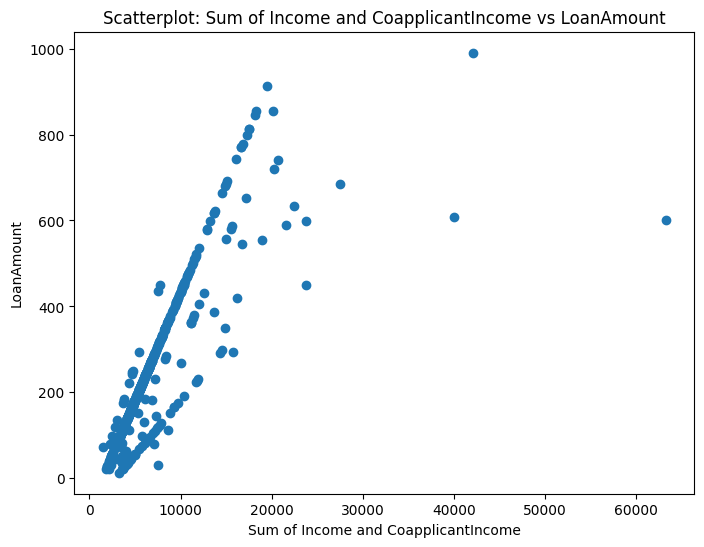

In [55]:
# Create a scatterplot between the sum of Income and CoapplicantIncome and LoanAmount
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'] + df['Coapplicant_Income'], df['Max_Loan_Amount'])
plt.xlabel('Sum of Income and CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatterplot: Sum of Income and CoapplicantIncome vs LoanAmount')
plt.show()

In [56]:
df_cleaned = df.dropna()
df_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y
5,LP001011,Male,Yes,2,Graduate,5417,4196.0,144.0,1.0,Urban,414.50,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,2900,0.0,144.0,1.0,Rural,76.16,Y
610,LP002979,Male,Yes,3+,Graduate,4106,0.0,72.0,1.0,Rural,33.47,Y
611,LP002983,Male,Yes,1,Graduate,8072,240.0,144.0,1.0,Urban,348.92,Y
612,LP002984,Male,Yes,2,Graduate,7583,0.0,144.0,1.0,Urban,312.18,Y


In [57]:
# Separate the last two columns from the rest
last_two_columns = df_cleaned.iloc[:, -2:]  # Select the last two columns
rest_of_columns = df_cleaned.iloc[:, :-2]  # Select all columns except the last two

# Create two separate datasets
targets = pd.DataFrame(last_two_columns)
features = pd.DataFrame(rest_of_columns)

# Display the two separate datasets
print("Targets:")
print(targets)

print("\nFeatures:")
print(features)

Targets:
     Max_Loan_Amount Loan_Status
1             236.99           N
2              81.20           Y
3             179.03           Y
4             232.40           Y
5             414.50           Y
..               ...         ...
609            76.16           Y
610            33.47           Y
611           348.92           Y
612           312.18           Y
613           160.98           N

[513 rows x 2 columns]

Features:
      Loan_ID  Gender Married Dependents     Education  Income  \
1    LP001003    Male     Yes          1      Graduate    4583   
2    LP001005    Male     Yes          0      Graduate    3000   
3    LP001006    Male     Yes          0  Not Graduate    2583   
4    LP001008    Male      No          0      Graduate    6000   
5    LP001011    Male     Yes          2      Graduate    5417   
..        ...     ...     ...        ...           ...     ...   
609  LP002978  Female      No          0      Graduate    2900   
610  LP002979    Male     Yes   